![image](./images/ssg.png)

# Overview

A couple of paragraphs describing:
1. Why do this project
2. Methods
3. EDA results
<hr>

# Outline

### I. Overview
### II. Data Preview
### III. Feature Engineering
### IV. Data Visualizations**
<hr>

# Data Preview
<hr>

In [22]:
#bring in relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import tqdm
from sklearn.decomposition import PCA, SparsePCA
import plotly.express as px
from functions import *
from sklearn.decomposition import IncrementalPCA
from scipy import sparse

In [2]:
dtype_dict = {'model_name':object, 'option':object, 'piece_id':object, 'piece_description':object,
       'piece_category':object, 'type':object, 'asin':int, 'm_x': int, 'm_y': int, 'm_xy':int, 'half':int, 'dysp':int,
       'addp':int, 'storage_area':object,'Type':object,
       'Num_Notch':int, 'Area':float, 'Perimeter':float, 'Internals':int, 'Points':int, 'Num_Sizes':object,
       'Num_Breaks':int, 'Base_Size':object, 'smallest':object, 'largest':object,
       'pc_type':object, 'labels':object}

#read in datasets
df1 = pd.read_csv('program_1.csv',dtype=dtype_dict)
df2 = pd.read_csv('program_2.csv',dtype=dtype_dict)
df3 = pd.read_csv('program_3.csv',dtype=dtype_dict)
df4 = pd.read_csv('program_4.csv',dtype=dtype_dict)
df5 = pd.read_csv('program_5.csv',dtype=dtype_dict)
df6 = pd.read_csv('program_6.csv',dtype=dtype_dict)

In [3]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df2.drop('Unnamed: 0',axis=1,inplace=True)
df3.drop('Unnamed: 0',axis=1,inplace=True)
df4.drop('Unnamed: 0',axis=1,inplace=True)
df5.drop('Unnamed: 0',axis=1,inplace=True)
df6.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
all_dfs = [df1,df2,df3,df4,df5,df6]

In [5]:
df1.head()

,model_name,option,piece_id,piece_description,piece_category,type,asin,m_x,m_y,m_xy,...,Perimeter,Internals,Points,Num_Sizes,Num_Breaks,Base_Size,smallest,largest,pc_type,labels
0,[kinqZ,KKqN[,YFXQI,RECTANGLE,DWELT,0,4,0,0,0,...,112.59,3,4,1,0,1,1,1,0.0,WELT
1,[kinqZ,KKqN[,YFXQI,RECTANGLE,DWELT,0,4,0,0,0,...,112.50,3,4,1,0,1,1,1,0.0,WELT
2,[kinqZ,KKqN[,YFXQI,RECTANGLE,DWELT,0,4,0,0,0,...,113.00,3,4,1,0,1,1,1,0.0,WELT
3,[kinqZ,KVqN[,YFXQI,RECTANGLE,DWELT,0,4,0,0,0,...,112.59,3,4,1,0,1,1,1,0.0,WELT
4,[kinqZ,KVqN[,YFXQI,RECTANGLE,DWELT,0,4,0,0,0,...,112.50,3,4,1,0,1,1,1,0.0,WELT


In [6]:
df1.columns

Index(['model_name', 'option', 'piece_id', 'piece_description',
       'piece_category', 'type', 'asin', 'm_x', 'm_y', 'm_xy', 'half', 'dysp',
       'addp', 'storage_area', 'Type', 'Num_Notch', 'Area', 'Perimeter',
       'Internals', 'Points', 'Num_Sizes', 'Num_Breaks', 'Base_Size',
       'smallest', 'largest', 'pc_type', 'labels'],
      dtype='object')

# Feature Engineering
<hr>

After some initial, messy, exploratory work I've learned that using an NLP-style ngram approach on the piece_category column is the best way to use that data as a predictor. Initially I dummied the categorical text variables but I didn't achieve much improvement in the predictive power that way. Here I took all of the piece category columns, turned them into ngrams of length 2,3 and 4. Then I sorted the ngrams by frequency and added boolean value columns for each value. I saved the files to csvs. Here, I'll read in the dataframes above ammended with the ngram boolean values.

I chose to remove this code from the notebook. It is saved in the file *preprocessing_ngrams.py* in the repo.

In [60]:
prog1=pd.read_csv('prog_1_ngrams.csv',dtype=dtype_dict)
prog2=pd.read_csv('prog_2_ngrams.csv',dtype=dtype_dict)
prog3=pd.read_csv('prog_3_ngrams.csv',dtype=dtype_dict)
prog4=pd.read_csv('prog_4_ngrams.csv',dtype=dtype_dict)
prog5=pd.read_csv('prog_5_ngrams.csv',dtype=dtype_dict)
prog6=pd.read_csv('prog_6_ngrams.csv',dtype=dtype_dict)

In [61]:
prog1.drop('Unnamed: 0',axis=1,inplace=True)
prog2.drop('Unnamed: 0',axis=1,inplace=True)
prog3.drop('Unnamed: 0',axis=1,inplace=True)
prog4.drop('Unnamed: 0',axis=1,inplace=True)
prog5.drop('Unnamed: 0',axis=1,inplace=True)
prog6.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
not_preds=['model_name','option','piece_id','piece_description','piece_category', 'pc_type','Num_Breaks',
 'Base_Size','Num_Breaks', 'Points',
 'Num_Sizes',
 'smallest',
 'largest',
 'pc_type',
 'labels', 'addp',
 'storage_area',
 'Type']
y = pd.DataFrame(prog1['labels'])
X = prog1.drop(not_preds,axis=1)

In [17]:
pca = PCA(n_components=3)
decomp=pca.fit_transform(X)
training = pd.DataFrame(decomp,columns=['pc1','pc2','pc3'])

In [18]:
eda_data = np.hstack((training,y))

In [ ]:
fig = px.scatter_3d(eda_data, x=0, y=1, z=2,opacity=.5,color=3,width=1000,height=1000)
fig.show()

In [24]:
transformer = IncrementalPCA(n_components=3, batch_size=1000)
X_transformed = transformer.fit_transform(X)


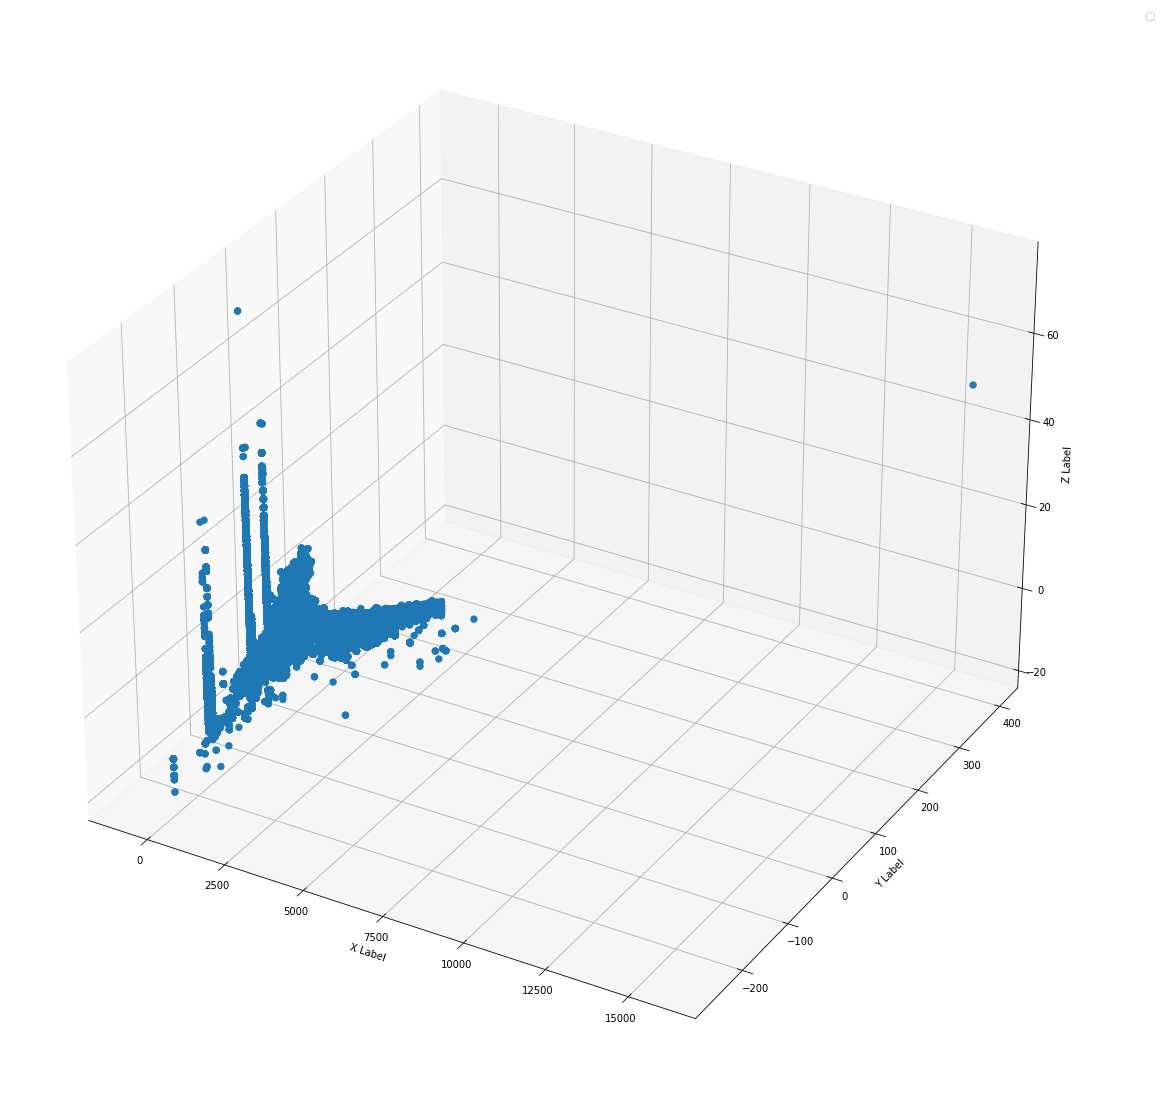

In [64]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 4
x = np.random.uniform(1, 20, size=n)
y = np.random.uniform(1, 100, size=n)
z = np.random.uniform(1, 100, size=n)

# axes instance
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# plot
sc = ax.scatter(training['pc1'], training['pc2'], training['pc3'], s=40, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [67]:
def decompose_and_plot(df,filename):
    """This function takes in the dataframe and returns a 3D plot. It uses sklearn incremental PCA to transform the predictors."""
    not_preds=['model_name','option','piece_id','piece_description','piece_category', 'pc_type','Num_Breaks',
     'Base_Size','Num_Breaks', 'Points','Num_Sizes','smallest','largest','pc_type','labels', 'addp','storage_area','Type']
    
    y = pd.DataFrame(df['labels'])
    X = df.drop(not_preds,axis=1)
    transformer = IncrementalPCA(n_components=3, batch_size=1000)
    X_transformed = transformer.fit_transform(X)
    eda_data = np.hstack((X_transformed,y))
    fig = px.scatter_3d(eda_data, x=0, y=1, z=2,opacity=.5,color=3,width=1000,height=1000)
    fig.write_html(filename+".html")
    return fig.show()

In [ ]:
decompose_and_plot(prog1,'prog1plot')


In [35]:
# decompose_and_plot(prog3)

In [36]:
# decompose_and_plot(prog4)

In [37]:
# decompose_and_plot(prog5)

In [40]:
# decompose_and_plot(prog6)